In [1]:
%cd /content
%mkdir dl_a1

/content


In [2]:
 %cd /content/dl_a1
!wget https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2


/content/dl_a1
--2025-02-28 13:58:27--  https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2
Resolving data.keithito.com (data.keithito.com)... 156.146.56.168, 2400:52e0:1500::747:1
Connecting to data.keithito.com (data.keithito.com)|156.146.56.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2748572632 (2.6G) [text/plain]
Saving to: ‘LJSpeech-1.1.tar.bz2’

LJSpeech-1.1.tar.bz 100%[===================>]   2.56G  91.9MB/s    in 36s     

2025-02-28 13:59:04 (72.1 MB/s) - ‘LJSpeech-1.1.tar.bz2’ saved [2748572632/2748572632]



In [3]:
%cd /content/dl_a1
!tar -xvjf LJSpeech-1.1.tar.bz2

Streaming output truncated to the last 5000 lines.
LJSpeech-1.1/wavs/LJ022-0089.wav
LJSpeech-1.1/wavs/LJ030-0192.wav
LJSpeech-1.1/wavs/LJ041-0078.wav
LJSpeech-1.1/wavs/LJ045-0249.wav
LJSpeech-1.1/wavs/LJ034-0035.wav
LJSpeech-1.1/wavs/LJ010-0152.wav
LJSpeech-1.1/wavs/LJ036-0174.wav
LJSpeech-1.1/wavs/LJ035-0076.wav
LJSpeech-1.1/wavs/LJ032-0176.wav
LJSpeech-1.1/wavs/LJ046-0113.wav
LJSpeech-1.1/wavs/LJ017-0096.wav
LJSpeech-1.1/wavs/LJ004-0098.wav
LJSpeech-1.1/wavs/LJ010-0147.wav
LJSpeech-1.1/wavs/LJ042-0230.wav
LJSpeech-1.1/wavs/LJ041-0033.wav
LJSpeech-1.1/wavs/LJ045-0229.wav
LJSpeech-1.1/wavs/LJ014-0199.wav
LJSpeech-1.1/wavs/LJ002-0082.wav
LJSpeech-1.1/wavs/LJ006-0055.wav
LJSpeech-1.1/wavs/LJ045-0120.wav
LJSpeech-1.1/wavs/LJ050-0028.wav
LJSpeech-1.1/wavs/LJ045-0215.wav
LJSpeech-1.1/wavs/LJ013-0121.wav
LJSpeech-1.1/wavs/LJ008-0025.wav
LJSpeech-1.1/wavs/LJ005-0240.wav
LJSpeech-1.1/wavs/LJ044-0026.wav
LJSpeech-1.1/wavs/LJ048-0127.wav
LJSpeech-1.1/wavs/LJ006-0195.wav
LJSpeech-1.1/wavs/LJ030-0

In [45]:
!pip install torchaudio librosa boto3

import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T


In [46]:
# Audio file path (LJ001-0002.wav) for the LJSpeech dataset.
audio_path = "/content/dl_a1/LJSpeech-1.1/wavs/LJ001-0002.wav"

Audio Signal Shape: (41885,)
Sampling Rate: 22050 Hz


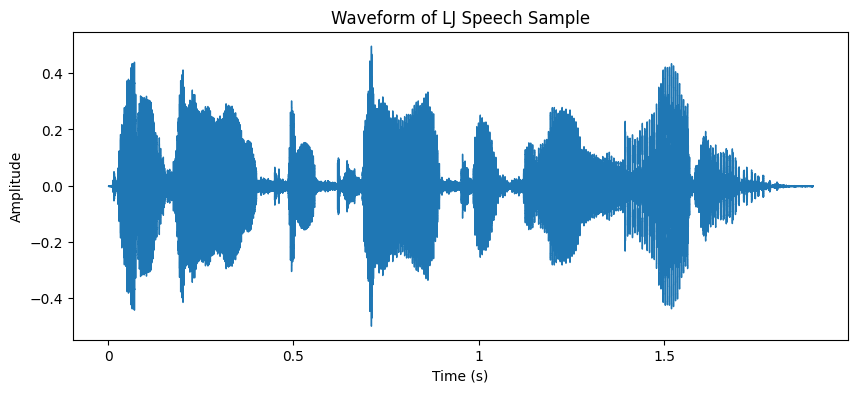

In [47]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
y, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate

# Display audio information
print(f"Audio Signal Shape: {y.shape}") # Number of samples
print(f"Sampling Rate: {sr} Hz")

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of LJ Speech Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

Processed Audio Shape: (30393,)
New Sampling Rate: 16000 Hz


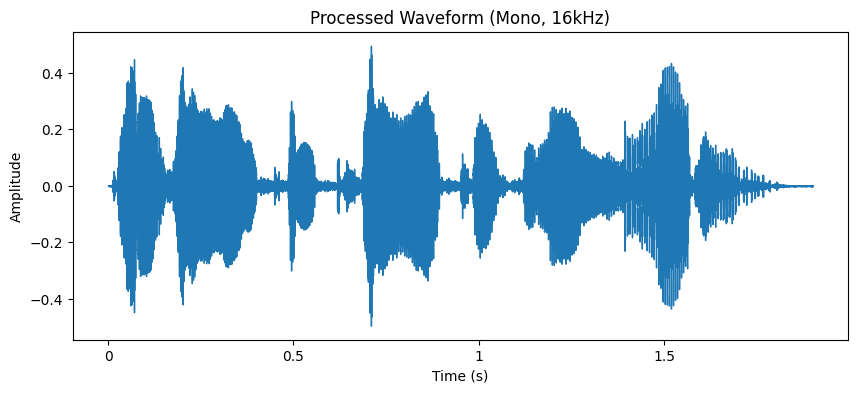

In [48]:

# Load audio converting it to mono and resampling to 16kHz
target_sr = 16000
y, sr = librosa.load(audio_path, sr=target_sr, mono=True)

# Display new audio properties
print(f"Processed Audio Shape: {y.shape}") # New shape after converting to mono
print(f"New Sampling Rate: {sr} Hz") # The new sampling rate should be 16Hz

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Processed Waveform (Mono, 16kHz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [49]:
!pip install torch torchaudio transformers librosa datasets

In [50]:
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

# Load a pre-trained Wav2Vec2 model and processor
model_name = "facebook/wav2vec2-large-960h"  # Multilingual model
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2ForCTC.from_pretrained(model_name)

y, sr = librosa.load(audio_path, sr=16000, mono=True)  # Ensure 16kHz sampling rate

# Normalize audio to fit the expected input range
input_values = processor(y, return_tensors="pt", sampling_rate=16000).input_values


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
!pip install pronouncing

import pronouncing
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
def get_phonemes(word):
 ## Gets the phonemes for a given word using the pronouncing library.
  return pronouncing.phones_for_word(word)[0]  # Get the first pronunciation

# Forward pass through the model
with torch.no_grad():
    logits = model(input_values).logits

# Get predicted token IDs from the output
predicted_ids = torch.argmax(logits, dim=-1)

# Decode the predicted token IDs into transcribed text
transcription = processor.batch_decode(predicted_ids)[0]
phoneme_output = [get_phonemes(word) for word in transcription.split()]
print("Transcribed Text:", transcription)
print("Phonemes:", phoneme_output)

Transcribed Text: IN BEING COMPARATIVELY MODERN
Phonemes: ['IH0 N', 'B IY1 IH0 NG', 'K AH0 M P EH1 R AH0 T IH0 V L IY0', 'M AA1 D ER0 N']


In [52]:
# Extract a particlular segment of the waveform (1s to 2s)
start_sample, end_sample = map(lambda t: int(t * sr), [1.0, 2.0])
segment = y[start_sample:end_sample]


In [53]:
# Find the word corresponding to this time segment in the transcription
num_samples = y.shape[0]
word_list = transcription.split()
extracted_word = word_list[int((start_sample / num_samples) * len(word_list))] if word_list else ''
# Get the phonemes of the extracted word
phoneme_sequence = get_phonemes(extracted_word)


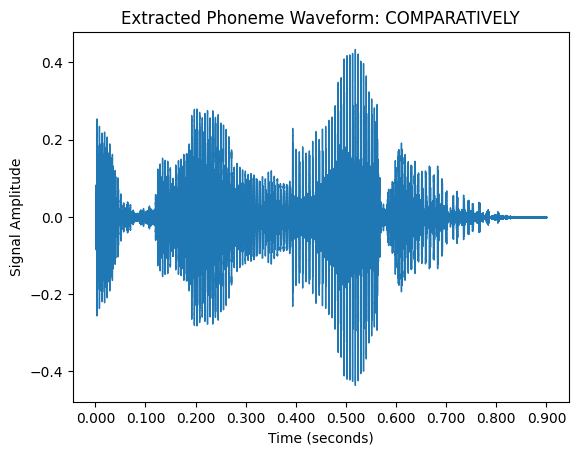

In [54]:
# Flatten the segment for visualization
waveform_section = np.ravel(phoneme_segment)
librosa.display.waveshow(waveform_section, sr=16000)
plt.title(f"Extracted Phoneme Waveform: {extracted_word}")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude")
plt.show()



In [55]:
# Print the matched word and its phonetic breakdown

print(f"Matched Word: {extracted_word}")
print(f"Phoneme Breakdown for '{extracted_word}': {phoneme_sequence}")

Matched Word: COMPARATIVELY
Phoneme Breakdown for 'COMPARATIVELY': K AH0 M P EH1 R AH0 T IH0 V L IY0
